In [84]:
from sympy import symbols, init_printing
import sympy
import sympy.physics.mechanics as me
from pydy.system import System
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# init_printing(False)
init_printing(True)
from IPython.display import set_matplotlib_formats
import InputShaping as shaping
set_matplotlib_formats('retina')

In [85]:
# Create the Main Frame
A = me.ReferenceFrame('A')

# Create the symbols
x1, x2, f1, f2 = me.dynamicsymbols('x_1 x_2 f_1 f_2')
x1_dot, x2_dot = me.dynamicsymbols('x1_dot x2_dot')

m1, m2, t, g, k, c = sympy.symbols('m_1 m_2 t g k c')

In [86]:
# Create the Origin
Origin = me.Point('Origin')
Origin.set_pos(Origin, 0)
Origin.set_vel(A, 0)

# Create the Trolley Points
P1 = me.Point('P1')
P2 = me.Point('P2')

# Set the Trolley Points Positions
P1.set_pos(Origin, x1 * A.x)
P2.set_pos(Origin, x2 * A.x)

# Set the Velocity of the Trolley Points
P1.set_vel(A, x1_dot * A.x)
P2.set_vel(A, x2_dot * A.x)

# Set up the kinematic differential equations
kde = [x1_dot - x1.diff(t),
       x2_dot - x2.diff(t)]

# Create the Particles
cart1 = me.Particle('cart1', P1, m1)
cart2 = me.Particle('cart2', P2, m2)

In [87]:
cart1_spring = (P1, k * (x2 - x1) * A.x)
cart2_spring = (P2, k * (x1 - x2) * A.x)

cart1_damper = (P1, c * (x2_dot - x1_dot) * A.x)
cart2_damper = (P2, c * (x1_dot - x2_dot) * A.x)

cart_force1 = (P1, (f1 + (0.5*f2)) * A.x)
cart_force2 = (P2, ((f1*0.5) + f2) * A.x)

loads = [cart_force1,
         cart_force2,
        cart1_spring,
        cart2_spring,
        cart1_damper,
        cart2_damper]

In [88]:
# Setting up the coordinates, speeds, and creating KanesMethod
coordinates = [x1, x2]
speeds = [x1_dot, x2_dot]
kane = me.KanesMethod(A, coordinates, speeds, kde)

# Creating Fr and Fr_star
fr, frstar = kane.kanes_equations(loads, [cart1, cart2])

# Creating the PyDy System
sys = System(kane)  

In [101]:
op_point = {x1:0,
            x2:0,
            x1_dot:0,
            x2_dot:0}

constants = {m1: 1,
             m2: 1,
             k: 10,
             c: 1}

In [102]:
linearizer = kane.to_linearizer()
Maz, A, B = linearizer.linearize()
M_op = me.msubs(Maz, op_point)
A_op = me.msubs(A, op_point)
B_op = me.msubs(B, op_point)

perm_mat = linearizer.perm_mat
A_lin = perm_mat.T * M_op.LUsolve(A_op)
B_lin = perm_mat.T * M_op.LUsolve(B_op)

A_lin_constants = me.msubs(A_lin, constants)
B_lin_constants = me.msubs(B_lin, constants)
A_sol = A_lin_constants.subs(op_point).doit()
B_sol = B_lin_constants.subs(op_point).doit()

A_np = np.array(np.array(A_sol), np.float)
B_np = np.array(np.array(B_sol), np.float)

eigenvals, eigenvects = np.linalg.eig(A_np)
eigen = eigenvals[0:9:2]
eigen_abs = np.abs(eigen)
damp = np.abs(np.real(eigen)/eigen_abs)

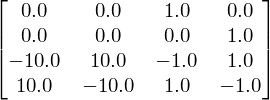

In [104]:
sympy.Matrix(A_np.round(2))

In [97]:
A_np

array([[ 0.0000,  0.0000,  1.0000,  0.0000],
       [ 0.0000,  0.0000,  0.0000,  1.0000],
       [-10.0000,  10.0000, -1.0000,  1.0000],
       [ 10.0000, -10.0000,  1.0000, -1.0000]])